Text(0.5, 1.0, 'bits:1')

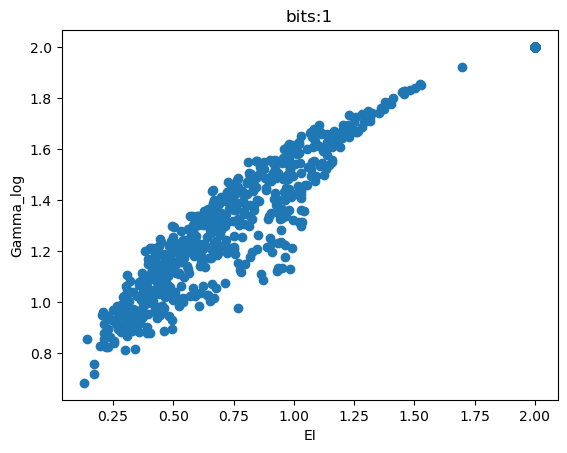

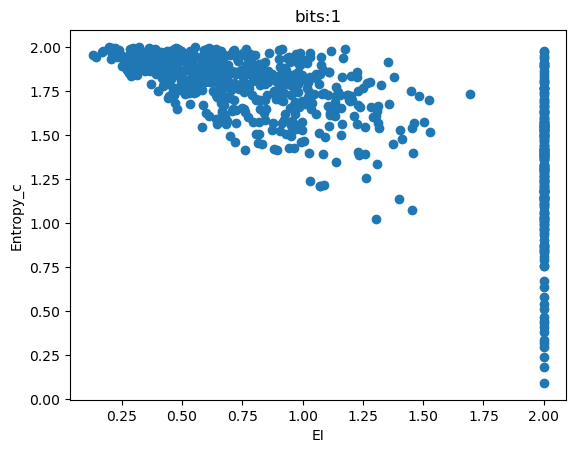

In [13]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from q_funcs import quantum_EI, generate_kraus_operators, kraus_to_transfer_matrix
from q_funcs import generate_depolarizing_kraus_operators, tpm_ei, compute_M_matrix_n_qubit
from q_funcs import compute_c_b

def H(p_ls):
    p_ls = np.array(p_ls)
    return -np.sum(np.where(p_ls > 0, p_ls * np.log2(p_ls), 0))

np.random.seed(42)
n = 1 #原本的量子比特数
k_ls = [1,2,3,4]
sample = 200
eigs_ls = []
ei_ls = []
entropy_c = []
for k in k_ls:
    for s in range(sample):
        kraus_operators = generate_kraus_operators(2**n, k)
        k_list = [kraus_operators[:,:,i] for i in range(k)]
        ei_ls.append(quantum_EI(k_list,2*n))
        M_mat = compute_M_matrix_n_qubit(k_list)
        f = np.diag(M_mat)
        c_b = compute_c_b(f, n)
        entropy_c.append(H(c_b))
        U, singular, V = np.linalg.svd(M_mat, full_matrices=False)
        eigs_ls.append(np.log2(np.sum(singular)))

    
plt.scatter(ei_ls, eigs_ls)
plt.xlabel("EI")
plt.ylabel("Gamma_log")
plt.title("bits:{0}".format(n))

plt.figure()
plt.scatter(ei_ls, entropy_c)
plt.xlabel("EI")
plt.ylabel("Entropy_c")
plt.title("bits:{0}".format(n))

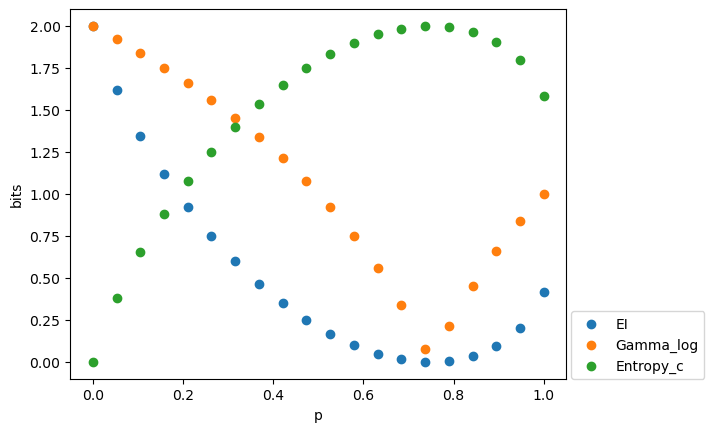

In [11]:
def H(p_ls):
    p_ls = np.clip(p_ls, a_min=1e-12, a_max=None)  # 替换零值为极小值
    return -np.sum(p_ls * np.log2(p_ls))

gamma_ls = []
ei_ls = []
entropy_c = []
x_axis = np.linspace(0,1,20)
for p in x_axis:
    kraus_ls = generate_depolarizing_kraus_operators(p)
    ei = quantum_EI(kraus_ls,2)
    ei_ls.append(ei)
    M_mat = compute_M_matrix_n_qubit(kraus_ls)
    f = np.diag(M_mat)
    c_b = compute_c_b(f, n)
    entropy_c.append(H(c_b))
    U, singular, V = np.linalg.svd(M_mat, full_matrices=False)
    gamma_ls.append(np.log2(np.sum(singular)))

plt.scatter(x_axis, ei_ls, label="EI")
#plt.figure()
plt.scatter(x_axis, gamma_ls, label="Gamma_log")
plt.scatter(x_axis, entropy_c, label="Entropy_c")
plt.xlabel("p")
plt.ylabel("bits")
plt.legend(loc=[1.01,0])
#plt.title("bits:{0}".format(n))

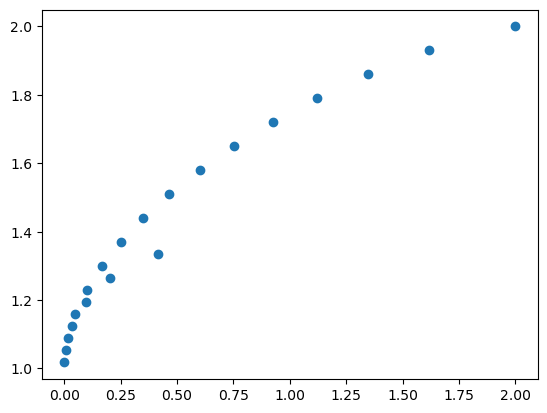

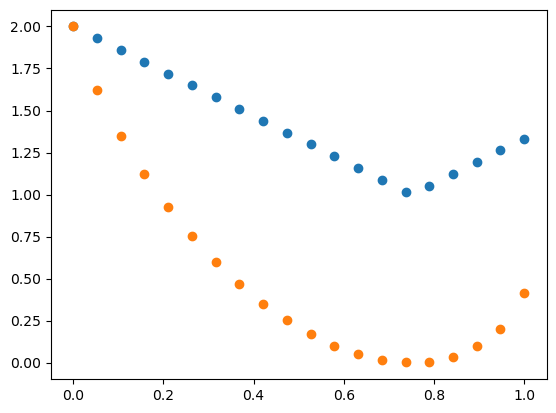

In [5]:
sing_ls = []
EI_ls = []
for p in np.linspace(0,1,20):
    kraus_ls = generate_depolarizing_kraus_operators(p)
    P = kraus_to_transfer_matrix(kraus_ls)
    U, singular, V = np.linalg.svd(P, full_matrices=False)
    sing_ls.append(np.sum(singular))
    EI_ls.append(quantum_EI(kraus_ls, 2))


plt.scatter(EI_ls, sing_ls)
plt.figure()
plt.scatter(np.linspace(0,1,20), sing_ls)
plt.scatter(np.linspace(0,1,20), EI_ls)

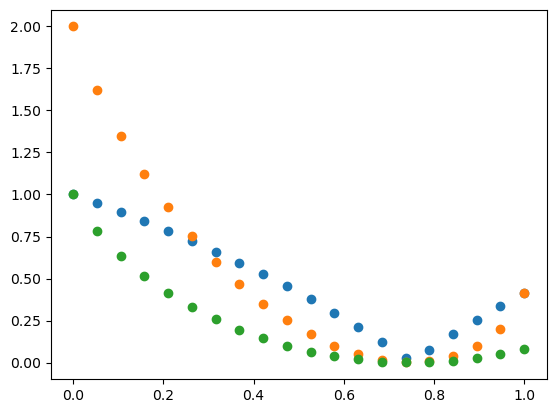

In [5]:
sing_ls = []
EI_ls = []
EI_P_ls = []
for p in np.linspace(0,1,20):
    kraus_ls = generate_depolarizing_kraus_operators(p)
    P = kraus_to_transfer_matrix(kraus_ls)
    U, singular, V = np.linalg.svd(P, full_matrices=False)
    sing_pro = np.log2(np.sum(singular))
    sing_ls.append(sing_pro)
    EI_ls.append(quantum_EI(kraus_ls, 2))
    EI_P_ls.append(tpm_ei(P))


#plt.scatter(EI_ls, sing_ls)
plt.figure()
plt.scatter(np.linspace(0,1,20), sing_ls)
plt.scatter(np.linspace(0,1,20), EI_ls)
plt.scatter(np.linspace(0,1,20), EI_P_ls)

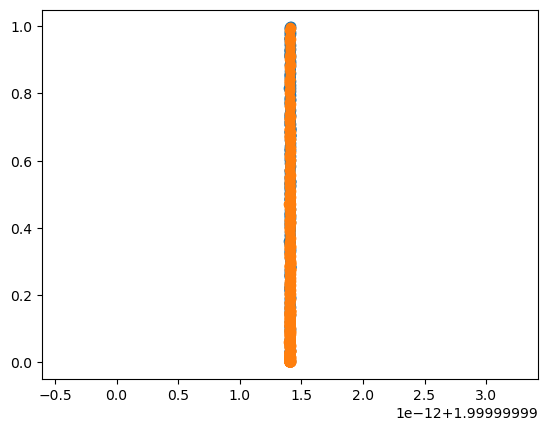

In [9]:
np.random.seed(42)
n = 1
k = 1
sample = 1000
sing_ls = []
EI_ls = []
EI_P_ls = []
for s in range(sample):
    kraus_operators = generate_kraus_operators(2**n, k)
    kraus_ls = [kraus_operators[:,:,i] for i in range(k)]
    P = kraus_to_transfer_matrix(kraus_ls)
    U, singular, V = np.linalg.svd(P, full_matrices=False)
    sing_pro = np.log2(np.sum(singular))
    sing_ls.append(sing_pro)
    EI_ls.append(quantum_EI(kraus_ls, 2*n))
    EI_P_ls.append(tpm_ei(P))
    
plt.figure()
plt.scatter(EI_ls, sing_ls)
plt.scatter(EI_ls, EI_P_ls)